In [1]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Input, Conv2D, 
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
labels = ['airplane','automobile','bird','cat','deer','dog',\
          'frog','horse','ship','truck']

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


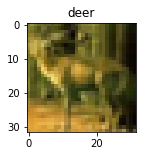

In [4]:
plt.figure(figsize=(2,2))
indx = np.random.choice(range(50000))
plt.imshow(x_train[indx])
plt.title(labels[y_train[indx][0]]);

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
w_init = tf.keras.initializers.RandomNormal(stddev=0.01)
cnn1 = Sequential([
    InputLayer(input_shape=(32,32,3)),
    Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), 
           kernel_initializer=w_init, bias_initializer='zeros',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', 
           kernel_initializer=w_init, bias_initializer='ones',padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', 
           kernel_initializer=w_init, bias_initializer='zeros',padding="same"),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', 
           kernel_initializer=w_init, bias_initializer='ones',padding="same"),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', 
           kernel_initializer=w_init, bias_initializer='ones',padding="same"),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, kernel_initializer=w_init, bias_initializer='ones', activation='relu'),
    Dropout(0.5),
    Dense(4096, kernel_initializer=w_init, bias_initializer='ones', activation='relu'),
    Dropout(0.5),
    Dense(10, kernel_initializer=w_init, bias_initializer='zeros', activation='softmax')
])

In [7]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
%%time
hist1 = cnn1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 23s 455us/sample - loss: 1.8964 - accuracy: 0.3423 - val_loss: 1.5124 - val_accuracy: 0.4496
Epoch 2/5
50000/50000 [==============================] - 21s 421us/sample - loss: 1.3884 - accuracy: 0.5131 - val_loss: 1.4178 - val_accuracy: 0.5002
Epoch 3/5
50000/50000 [==============================] - 21s 420us/sample - loss: 1.2188 - accuracy: 0.5860 - val_loss: 1.3915 - val_accuracy: 0.5394
Epoch 4/5
50000/50000 [==============================] - 21s 422us/sample - loss: 1.1115 - accuracy: 0.6256 - val_loss: 1.1495 - val_accuracy: 0.6116
Epoch 5/5
50000/50000 [==============================] - 21s 420us/sample - loss: 1.0541 - accuracy: 0.6522 - val_loss: 1.1651 - val_accuracy: 0.6247
CPU times: user 2min 25s, sys: 29.7 s, total: 2min 55s
Wall time: 1min 48s


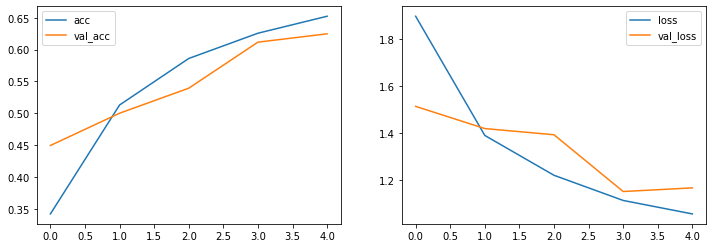

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.legend()

# Versione migliorata

In [10]:
cnn2 = Sequential([
    InputLayer(input_shape=(32,32,3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    #
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    #
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    #
    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')])

In [11]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
#hist2 = cnn2.fit(train_generator, validation_data=(x_test, y_test),
#              steps_per_epoch=steps_per_epoch, epochs=50)

In [13]:
#cnn2.save_weights('cnn2_weights')
#pickle.dump(hist2.history,open('cnn2_history.pkl','wb'))

In [14]:
cnn2.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 154us/sample - loss: 2.3078 - accuracy: 0.1000


[2.3078091156005858, 0.1]

In [15]:
cnn2.load_weights('cnn2_weights')
hist2 = pickle.load(open('cnn2_history.pkl','rb'))

In [16]:
cnn2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 134us/sample - loss: 0.4215 - accuracy: 0.8627


[0.4215117091178894, 0.8627]

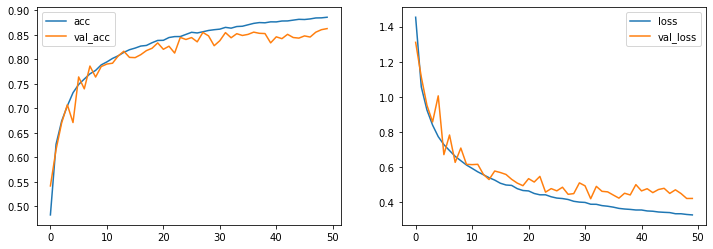

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist2['accuracy'], label='acc')
plt.plot(hist2['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist2['loss'], label='loss')
plt.plot(hist2['val_loss'], label='val_loss')
plt.legend();